**Part 2: Bicycle Rental prediction**

You are provided hourly bike rental data spanning two years. For this task, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
```
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

Submission

Train.csv has the historical ridership data, and test.csv has the variables for the day / hour we are looking to predict total ridership count. Submit a Python notebook that takes us through the data exploration, cleaning, and development of your model. Use your model to predict the number of total rentals for each entry in the test.csv file.

# Loading data, initial inspection

We will load the bike dataset training and test sets and we will inspect some of the columns to make sure they match up with what andrew described.

In [15]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
df_train = pd.read_csv('train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [17]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
 df_train.shape

(10886, 12)

In [19]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
df_test.shape

(6493, 9)

In [21]:
# set indices to be dt indices
df_train.index = df_train['datetime']
df_test.index = df_test['datetime']

In [22]:
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [23]:
df_test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

# Let's look at the data

In [24]:
bone = plt.cm.get_cmap('bone')
colors = [0.1, 0.3, 0.5, 0.75, 0.8, 1.0]

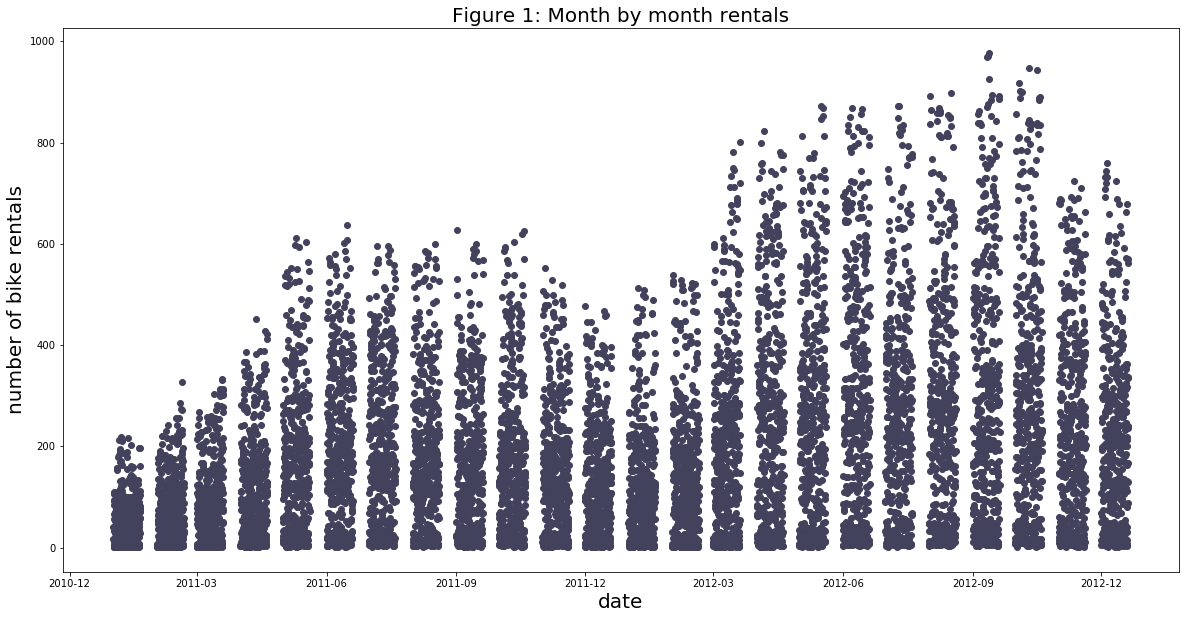

In [30]:
plt.figure(figsize=(20,10))
plt.plot_date(df_train['datetime'], df_train['count'], color=bone(colors[1]))
plt.title('Figure 1: Month by month rentals', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of bike rentals', fontsize=20)
plt.show()

Let's look at the ridership on different time scales: 

By day of the week, by hour of the day.

Modeling most time series data is basically the practice of modeling out the trend and the seasonality. IF we can define these two things for a dataset we can have a shot at predicting future time points (or interpolating removed points).

There appears to be an upwards trend over the 2 year period here. There also appears to be some 'seasonality' fluctating 




In [ ]:
# make see through plots of those